In [68]:
import pandas as pd
from datetime import date, timedelta
import seaborn as sns
import matplotlib.pyplot as plt

def get_metrics(date, matrix_strategy, exploration_strategy):
    path = f'progressive_matrices/{matrix_strategy}/validation_metrics/valid_metrics_{date.strftime("%Y-%m-%d")}_{matrix_strategy}'
    valid_dict = pd.read_pickle(path)
    tmp_dict = {}
    tmp_dict['train_date'] = date.strftime("%Y-%m-%d")
    tmp_dict['valid_date'] = (date + delta).strftime("%Y-%m-%d")
    tmp_dict['matrix_strategy'] = matrix_strategy
    tmp_dict['exploration_strategy'] = exploration_strategy
    tmp_dict['unique_users'] = valid_dict['unique_users']
    tmp_dict['deepFM_mu'] = valid_dict['deepFM_params'][0]
    tmp_dict['deepFM_sigma'] = valid_dict['deepFM_params'][1]
    tmp_dict['explo_mu'] = valid_dict['variances_params'][0]
    tmp_dict['explo_sigma'] = valid_dict['variances_params'][1]
    tmp_dict['NDCG@1'] = valid_dict[f'{exploration_strategy}_valid_results']['ndcg_results']['NDCG@1']
    tmp_dict['NDCG@3'] = valid_dict[f'{exploration_strategy}_valid_results']['ndcg_results']['NDCG@3']
    tmp_dict['NDCG@5'] = valid_dict[f'{exploration_strategy}_valid_results']['ndcg_results']['NDCG@5']
    tmp_dict['High + New Release @ 1'] = valid_dict[f'{exploration_strategy}_valid_results']['popularity_dist_dict']['Popularity distribution @ 1']['High'] + valid_dict[f'{exploration_strategy}_valid_results']['popularity_dist_dict']['Popularity distribution @ 1']['Weekly New Releases']
    tmp_dict['Medium @ 1'] = valid_dict[f'{exploration_strategy}_valid_results']['popularity_dist_dict']['Popularity distribution @ 1']['Medium']
    tmp_dict['Low @ 1'] = valid_dict[f'{exploration_strategy}_valid_results']['popularity_dist_dict']['Popularity distribution @ 1']['Low']
    tmp_dict['Negligible @ 1'] = valid_dict[f'{exploration_strategy}_valid_results']['popularity_dist_dict']['Popularity distribution @ 1']['Negligible']
    tmp_dict['Unique Catalog Length @ 1'] = valid_dict[f'{exploration_strategy}_valid_results']['catalog_dict']['Catalog Length @ 1']
    tmp_dict['Perplexity @ 1'] = valid_dict[f'{exploration_strategy}_valid_results']['perplexity_at_k']['Perplexity @ 1']
    return tmp_dict

start_date = date(2026, 2, 5)
end_date = date(2026, 2, 11)
delta = timedelta(days=1)

matrix_strategy = ['cumulative', 'penalized', 'reseted']
exploration_strategies = ['deepFM', 'explo', 'balanced']
output_list = []

while start_date <= end_date:
    for strategy in matrix_strategy:
        for exploration_strategy in exploration_strategies:
            metric_dict = get_metrics(start_date, strategy, exploration_strategy)
            output_list.append(metric_dict)
    start_date += delta

In [69]:
metrics_df = pd.DataFrame(output_list)

In [70]:
metrics_df.columns

Index(['train_date', 'valid_date', 'matrix_strategy', 'exploration_strategy',
       'unique_users', 'deepFM_mu', 'deepFM_sigma', 'explo_mu', 'explo_sigma',
       'NDCG@1', 'NDCG@3', 'NDCG@5', 'High + New Release @ 1', 'Medium @ 1',
       'Low @ 1', 'Negligible @ 1', 'Unique Catalog Length @ 1',
       'Perplexity @ 1'],
      dtype='object')

In [71]:
metrics = ['NDCG@5', 'High + New Release @ 1', 'Medium @ 1', 'Low @ 1', 'Negligible @ 1', 'Unique Catalog Length @ 1','Perplexity @ 1']

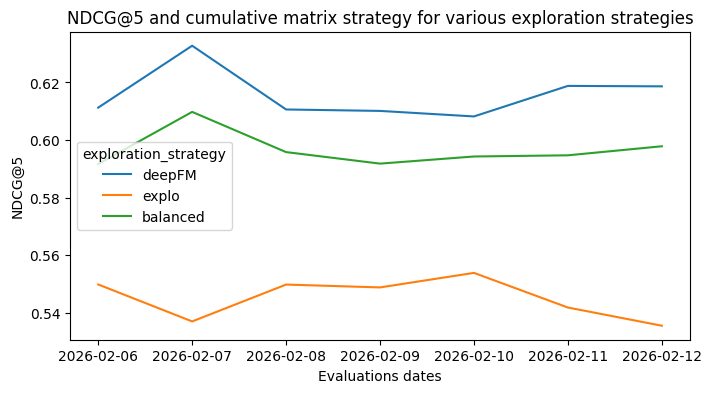

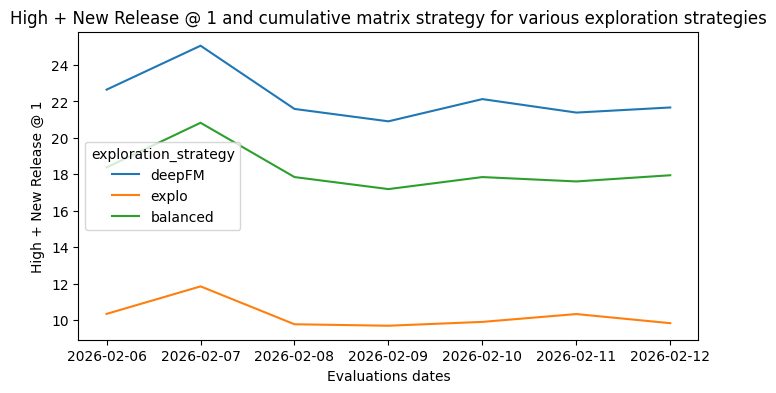

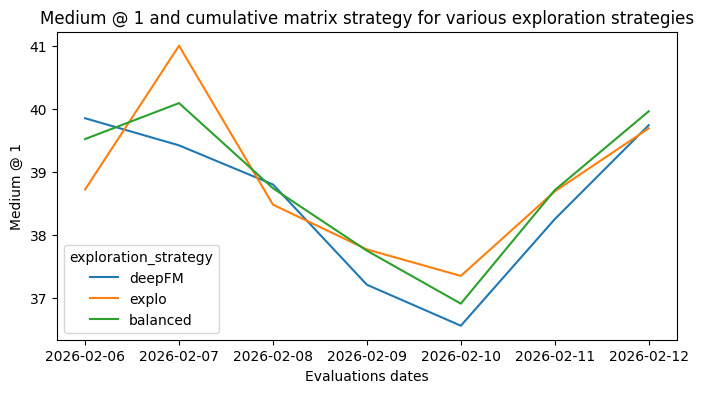

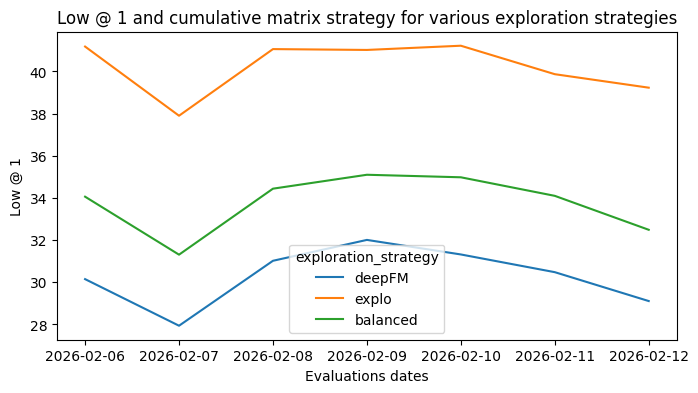

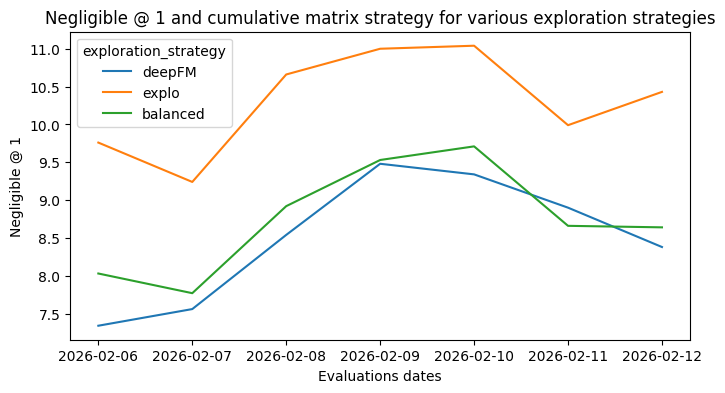

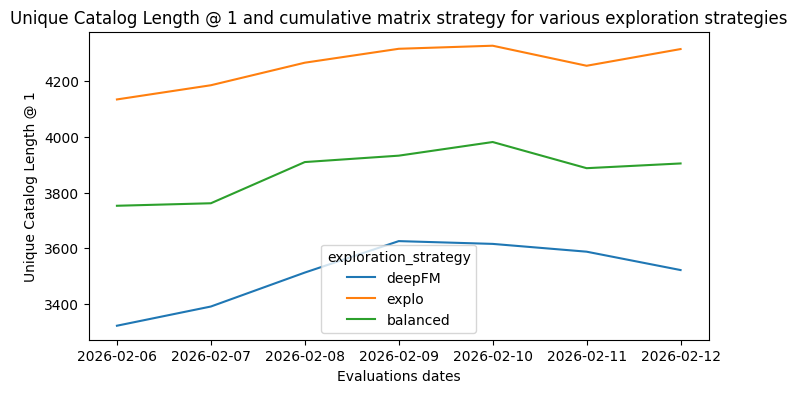

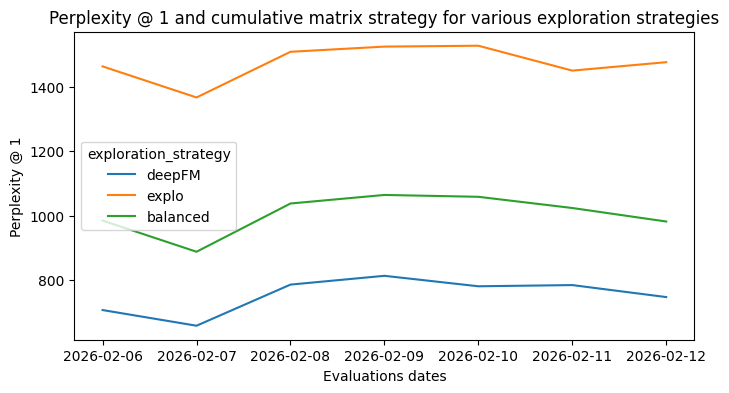

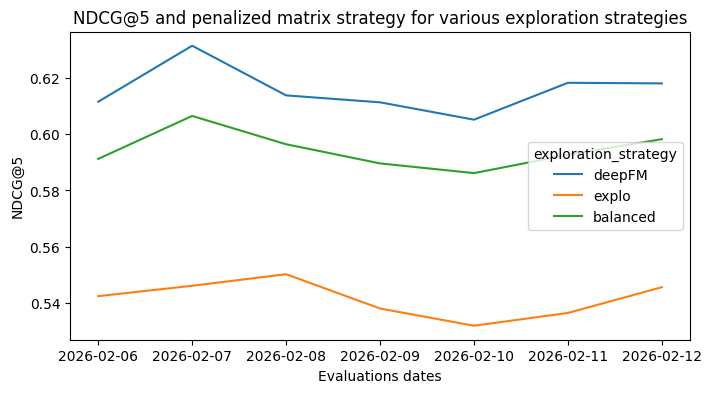

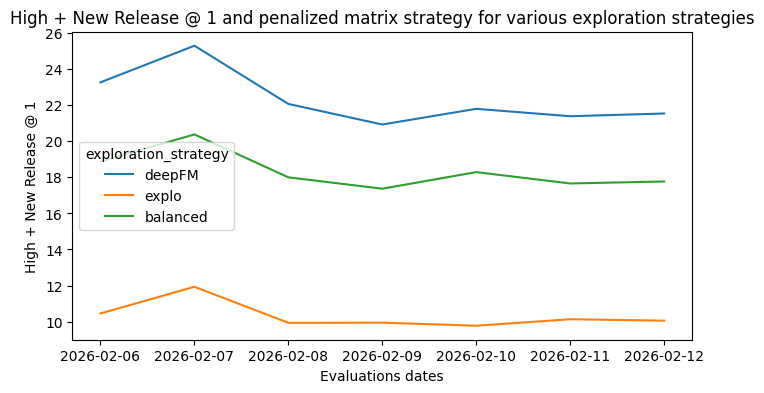

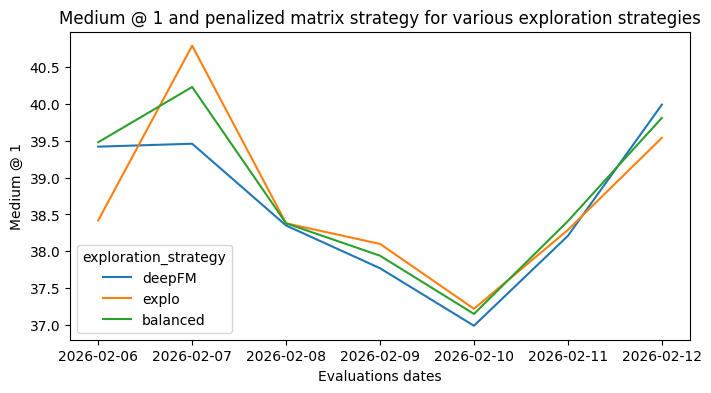

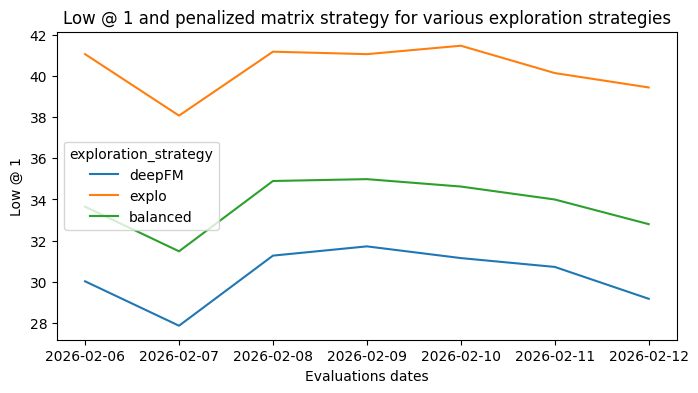

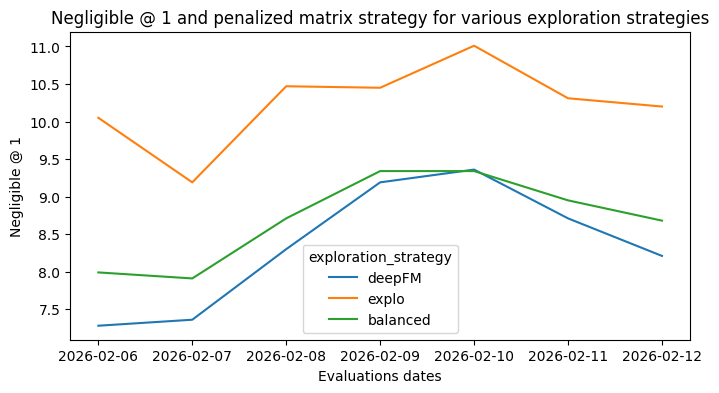

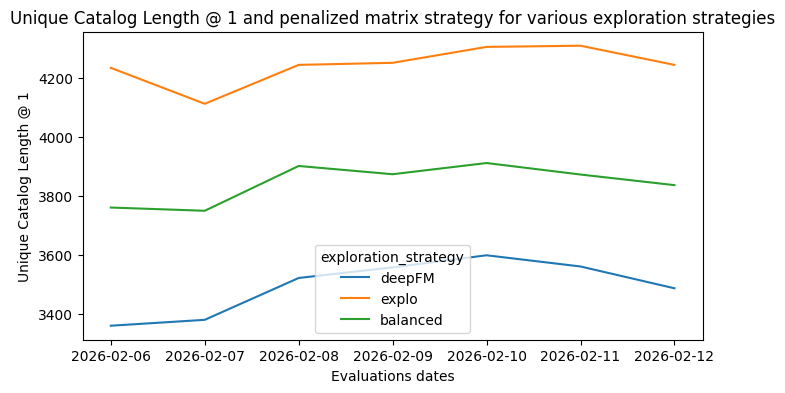

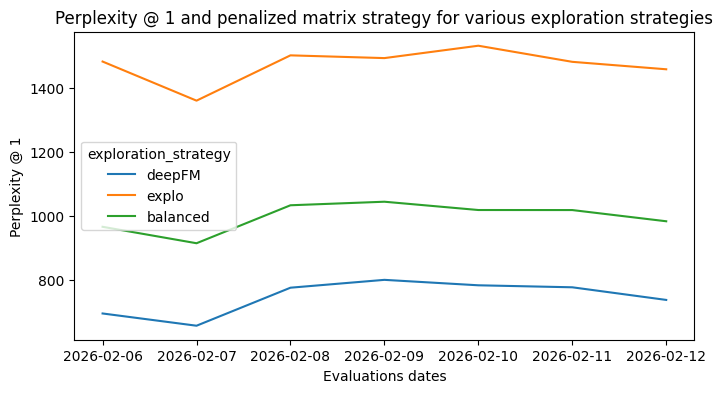

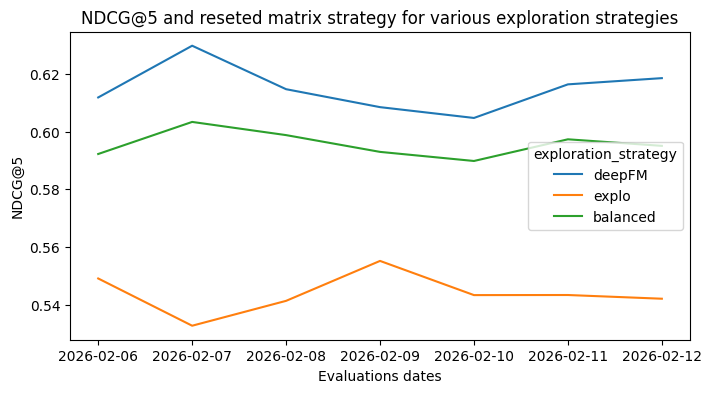

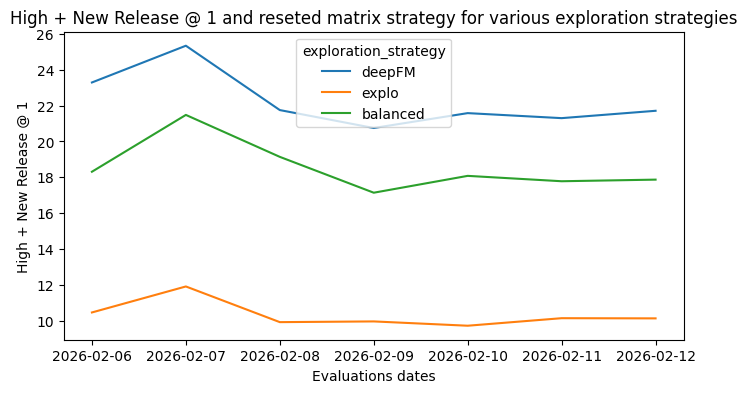

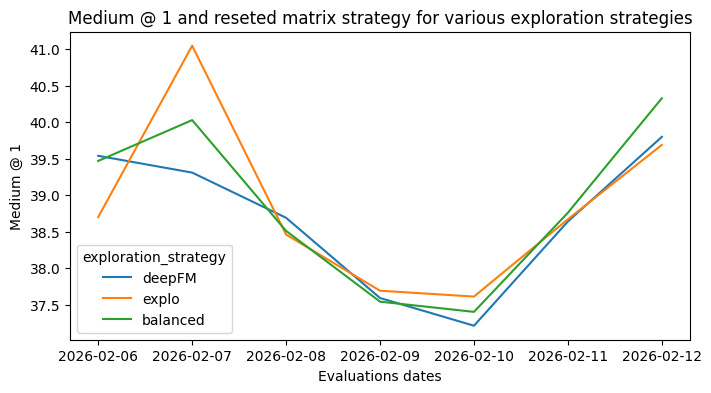

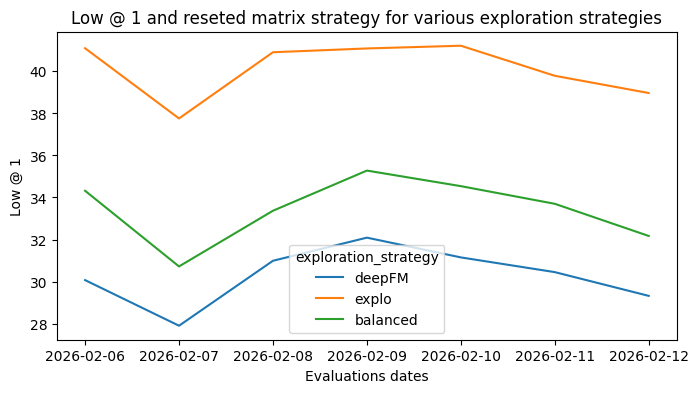

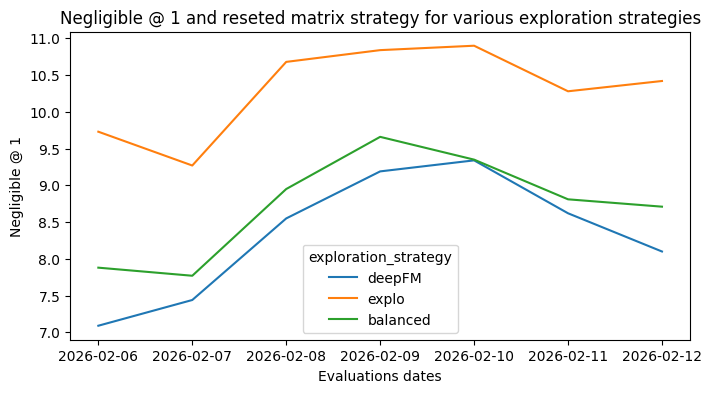

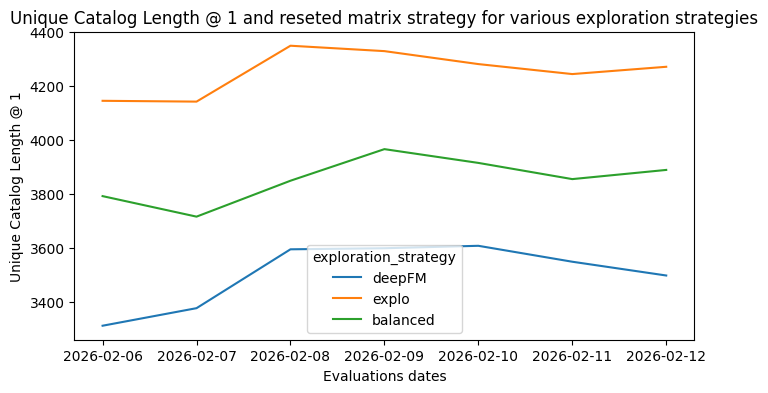

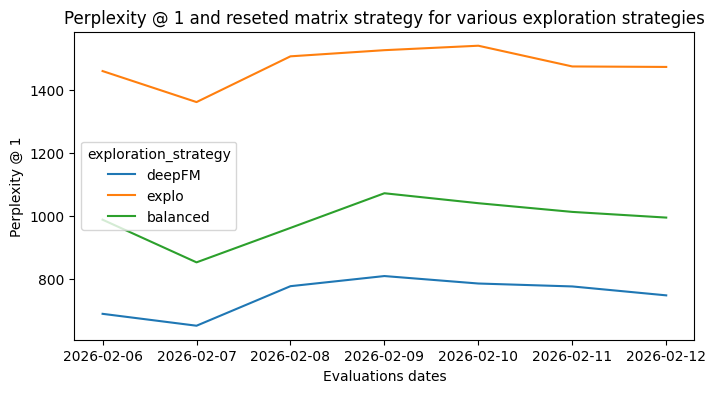

In [72]:
for strategy in matrix_strategy:
    for metric in metrics:
        plt.figure(figsize=(8, 4))

        ax = sns.lineplot(x='valid_date', 
                          y=metric, 
                          hue="exploration_strategy", 
                          data=metrics_df[metrics_df['matrix_strategy'] == strategy])

        plt.title(f"{metric} and {strategy} matrix strategy for various exploration strategies")
        plt.xlabel("Evaluations dates")
        plt.ylabel(metric)
        plt.show()

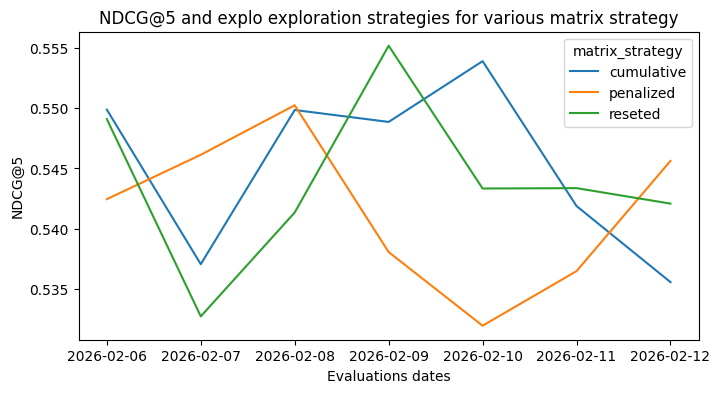

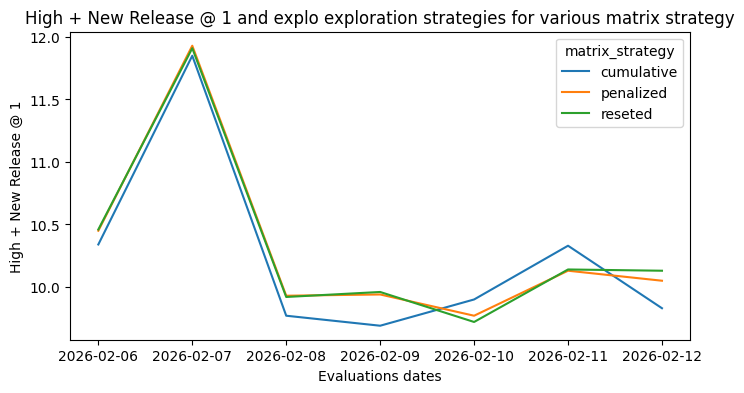

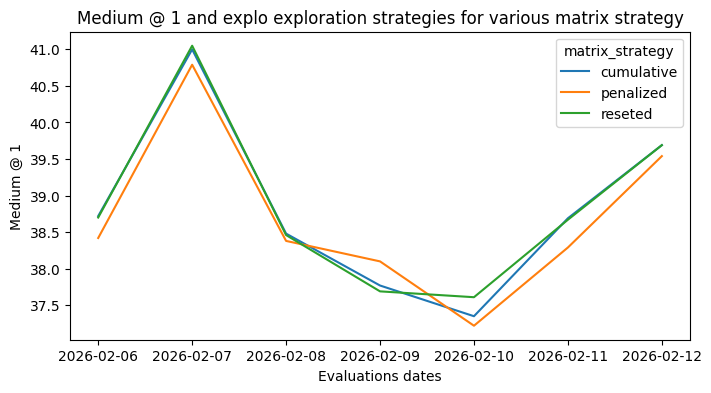

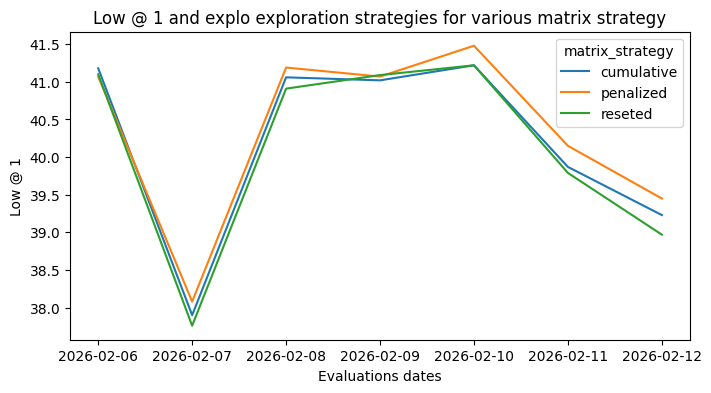

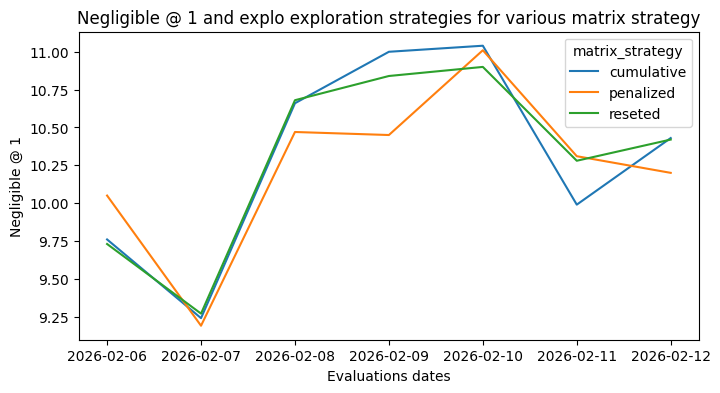

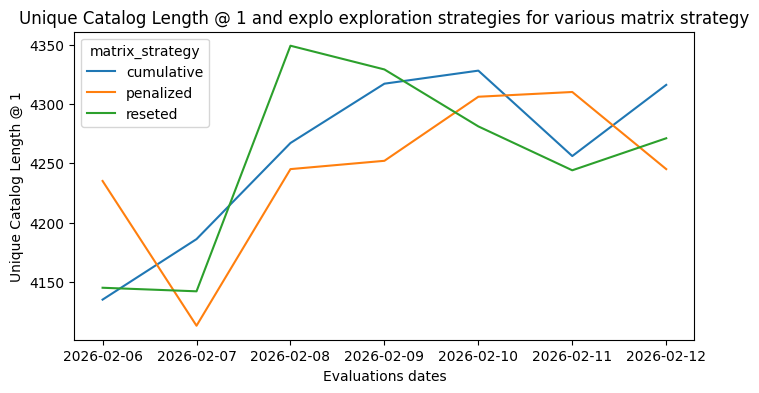

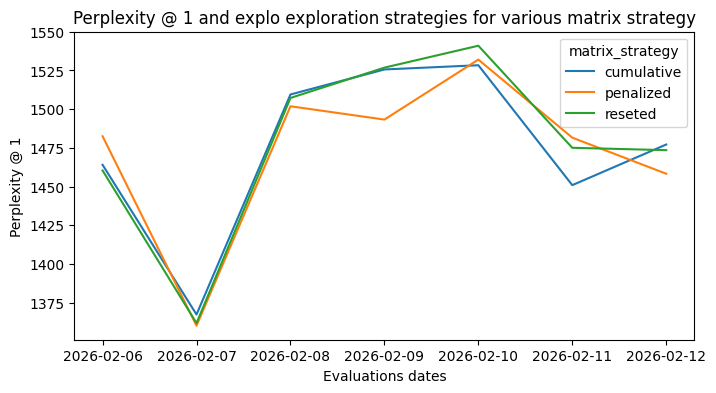

In [77]:
for exploration_strategy in exploration_strategies:
    for metric in metrics:
        if exploration_strategy == 'explo':
            plt.figure(figsize=(8, 4))

            ax = sns.lineplot(x='valid_date', 
                              y=metric, 
                              hue="matrix_strategy", 
                              data=metrics_df[metrics_df['exploration_strategy'] == exploration_strategy])

            plt.title(f"{metric} and {exploration_strategy} exploration strategies for various matrix strategy")
            plt.xlabel("Evaluations dates")
            plt.ylabel(metric)
            plt.show()

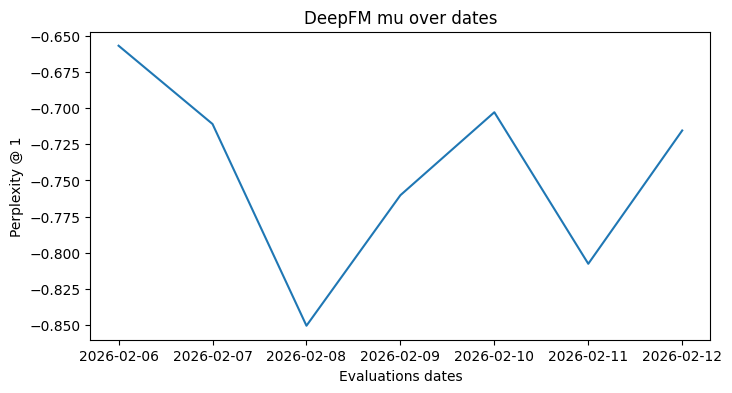

In [74]:
plt.figure(figsize=(8, 4))

ax = sns.lineplot(x='valid_date', 
                  y='deepFM_mu', 
                  data=metrics_df[(metrics_df['matrix_strategy'] == 'cumulative') & (metrics_df['exploration_strategy'] == 'explo')])

plt.title(f"DeepFM mu over dates")
plt.xlabel("Evaluations dates")
plt.ylabel(metric)
plt.show()

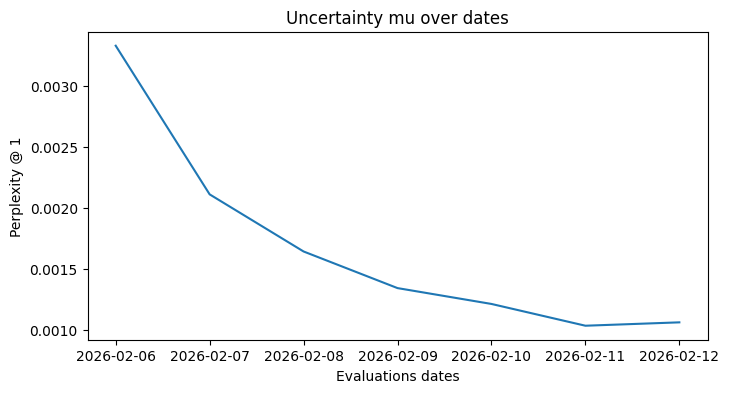

In [75]:
plt.figure(figsize=(8, 4))

ax = sns.lineplot(x='valid_date', 
                  y='explo_mu', 
                  data=metrics_df[(metrics_df['matrix_strategy'] == 'cumulative') & (metrics_df['exploration_strategy'] == 'explo')])

plt.title(f"Uncertainty mu over dates")
plt.xlabel("Evaluations dates")
plt.ylabel(metric)
plt.show()

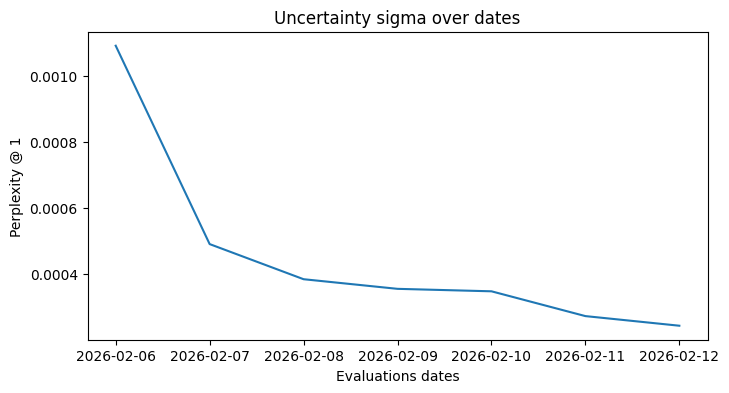

In [79]:
plt.figure(figsize=(8, 4))

ax = sns.lineplot(x='valid_date', 
                  y='explo_sigma', 
                  data=metrics_df[(metrics_df['matrix_strategy'] == 'penalized') & (metrics_df['exploration_strategy'] == 'explo')])

plt.title(f"Uncertainty sigma over dates")
plt.xlabel("Evaluations dates")
plt.ylabel(metric)
plt.show()

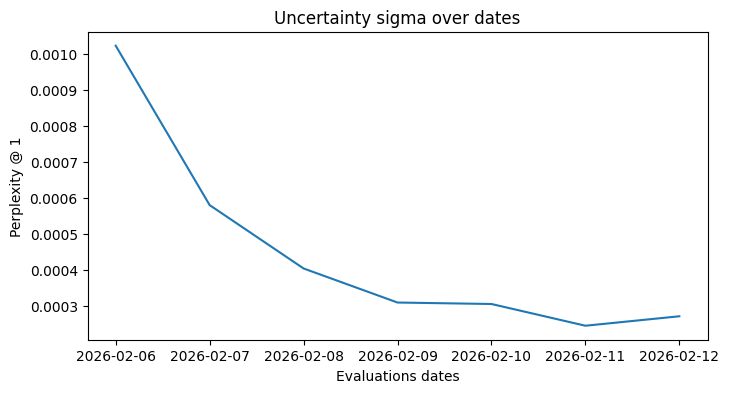

In [80]:
plt.figure(figsize=(8, 4))

ax = sns.lineplot(x='valid_date', 
                  y='explo_sigma', 
                  data=metrics_df[(metrics_df['matrix_strategy'] == 'cumulative') & (metrics_df['exploration_strategy'] == 'explo')])

plt.title(f"Uncertainty sigma over dates")
plt.xlabel("Evaluations dates")
plt.ylabel(metric)
plt.show()